# Import

In [1]:
import numpy as np
import sys 
import os
sys.path.append("../")
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
main_dir = '../output/explainer'
attribute = 'Young'
gan_exp = 'CelebA-Young-Binary/test'
start = ['']
main_index = 0
num_channel = 3
num_cls = 1
n = 1
n_bins = 10
input_size = 128

# Read Numpy Arrays

In [3]:
input_img = np.load(os.path.join(main_dir, gan_exp, 'real_img.npy'))
input_pred = np.load(os.path.join(main_dir, gan_exp, 'real_pred.npy'))
fake_img = np.load(os.path.join(main_dir, gan_exp, 'fake_images.npy'))
fake_pred = np.load(os.path.join(main_dir, gan_exp, 'fake_pred.npy'))                

print(attribute, input_img.shape)
print(attribute, fake_img.shape)
print(attribute, input_pred.shape)
print(attribute, fake_pred.shape)

Young (20, 3, 128, 128)
Young (200, 3, 128, 128)
Young (200, 1)
Young (200, 1)


# Final plot

In [4]:
input_pred = np.reshape(input_pred, [-1, n_bins, num_cls])
input_pred = np.mean(input_pred, axis=1)
fake_pred = np.reshape(fake_pred, [-1, n_bins, num_cls])
fake_img = np.reshape(fake_img, [-1, n_bins, num_channel, input_size, input_size])

In [5]:
print(input_pred.shape)
print(fake_pred.shape)
print(input_img.shape)
print(fake_img.shape)

(20, 1)
(20, 10, 1)
(20, 3, 128, 128)
(20, 10, 3, 128, 128)


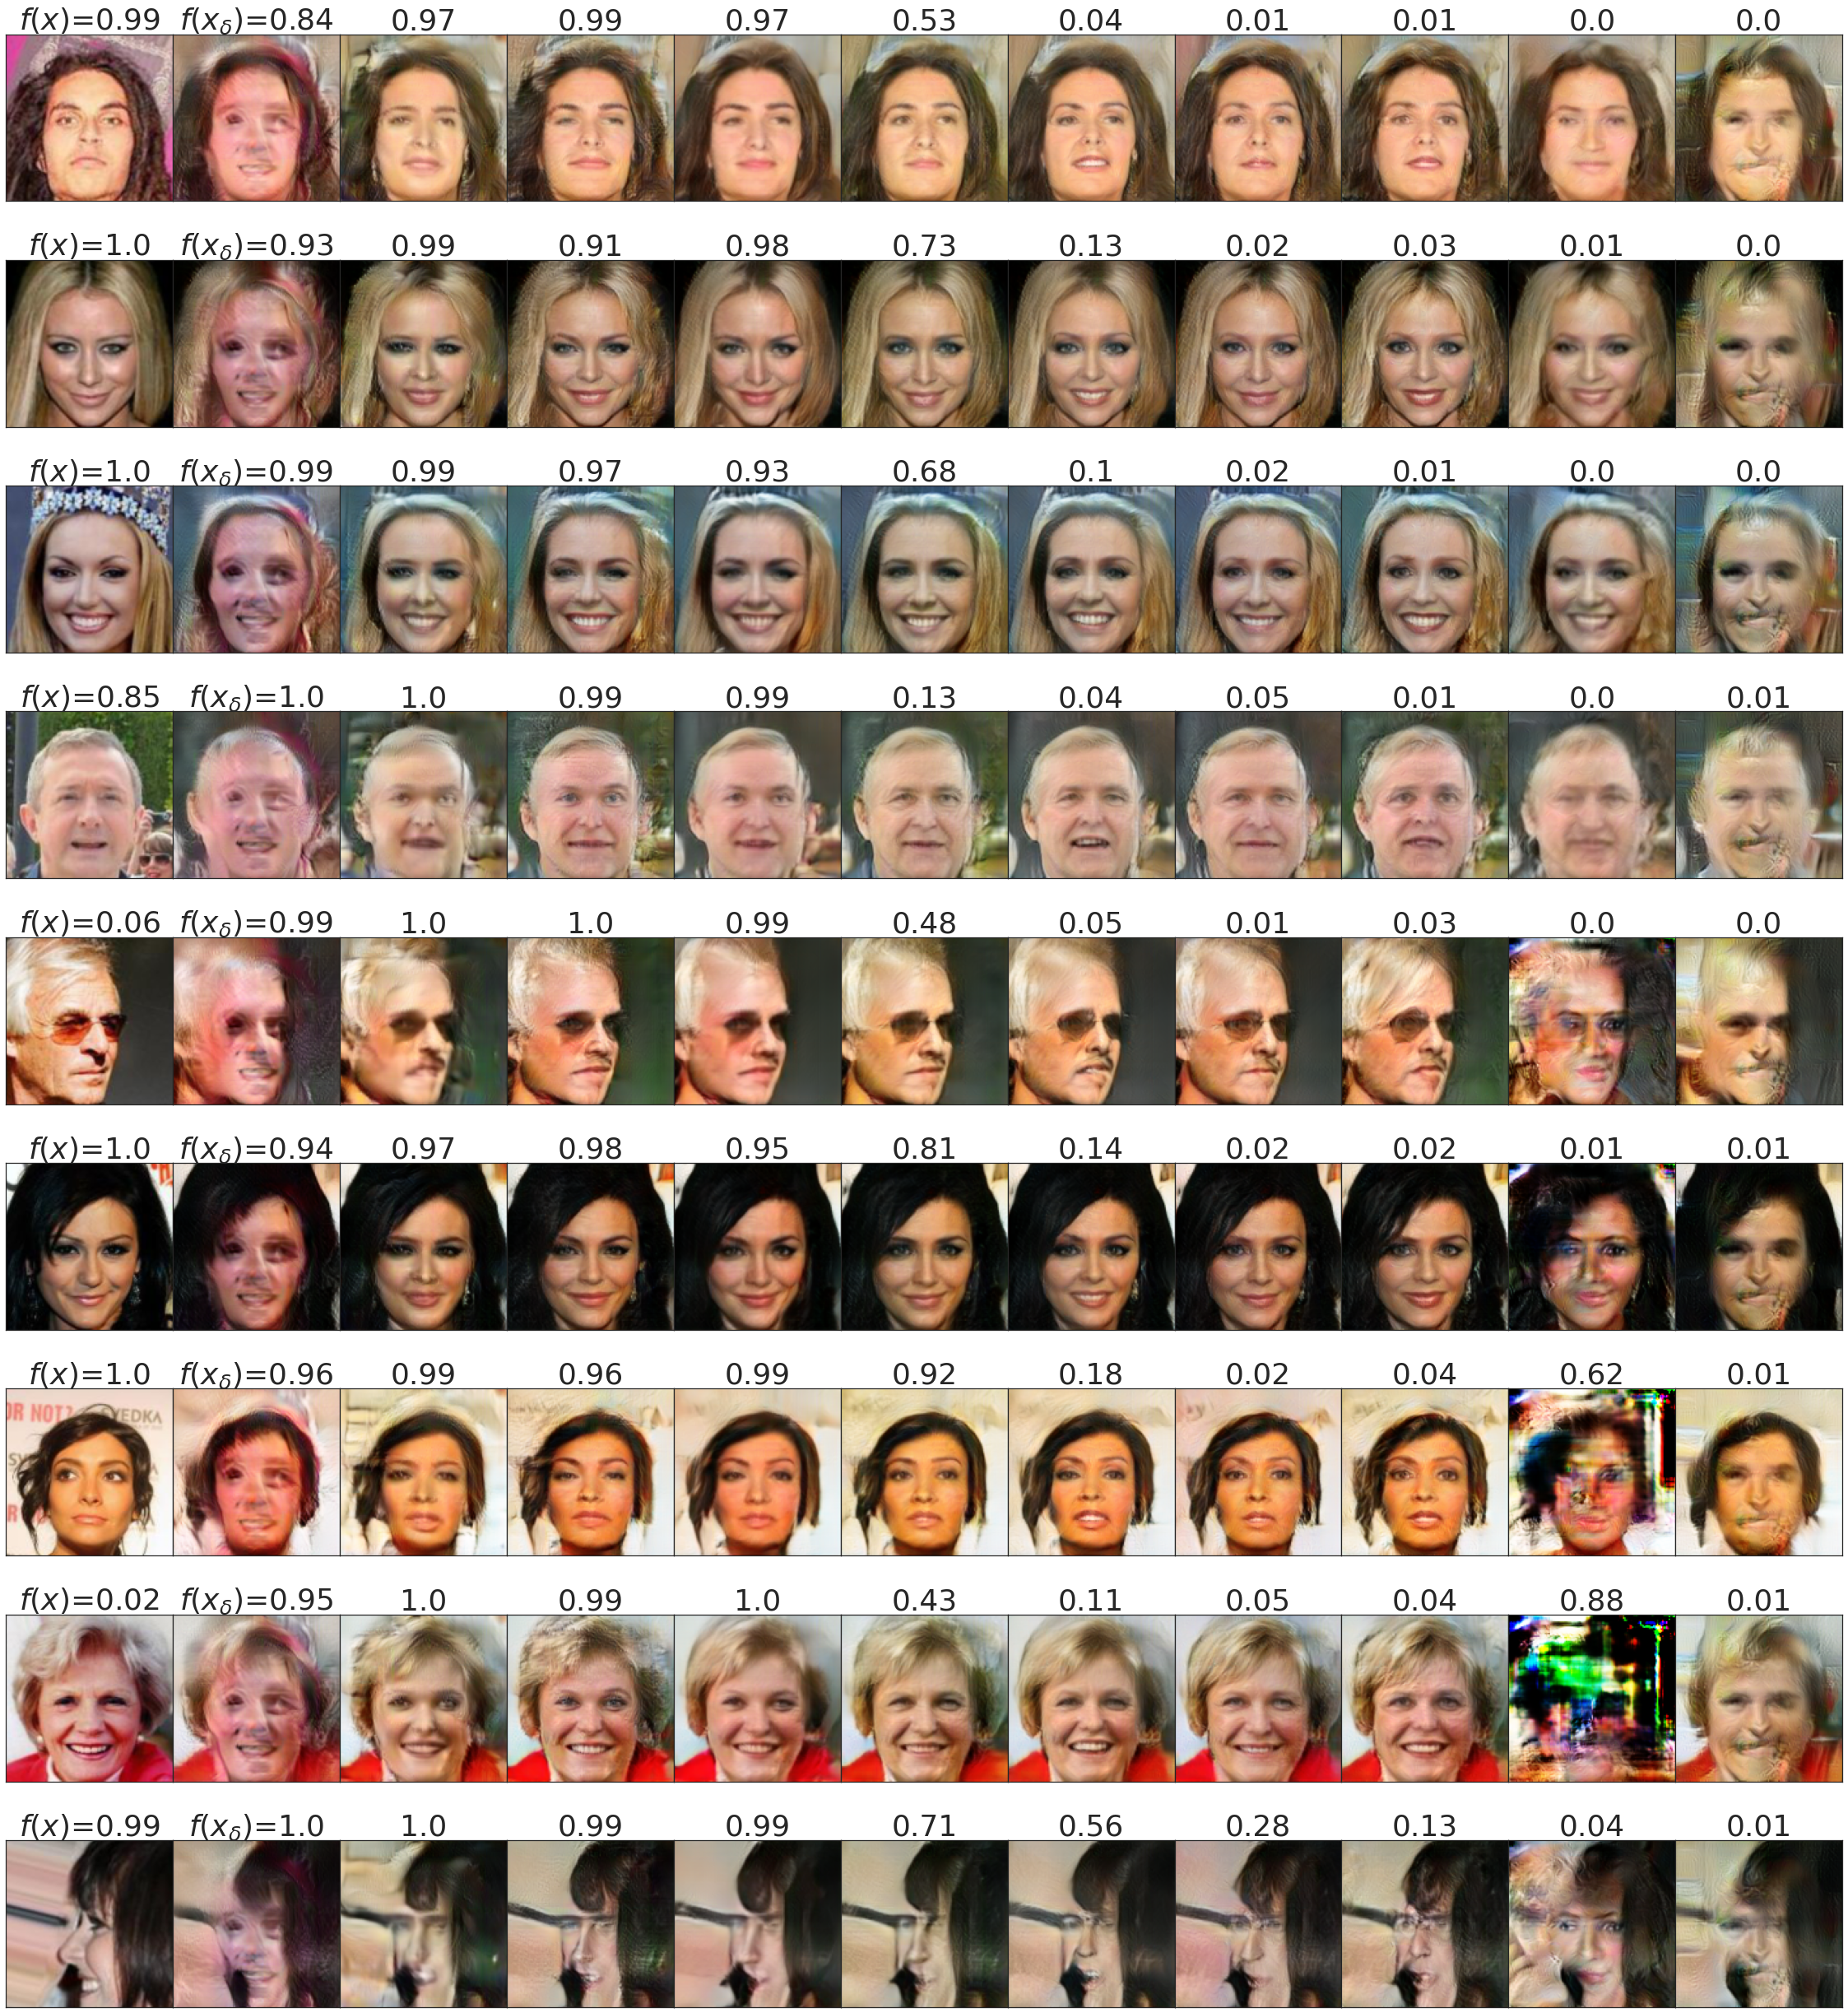

In [7]:
sns.set(style="white")
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2})

samples = [0, 1, 2, 3, 4, 5, 6, 8, 10]

fig = plt.figure(figsize=(40, 50))
counter = 0

for index in samples:
    counter += 1
    
    plt.subplot(10, 11, counter)
    plt.imshow(torch.tensor(input_img[index]).permute(1, 2, 0) * 0.5 + 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title('$f(x)$=' + str(np.round(input_pred[index][main_index], decimals=2)))
    for j in range(n_bins):
        counter += 1
        plt.subplot(10, 11, counter)
        plt.imshow(torch.tensor(fake_img[index][j]).permute(1, 2, 0) * 0.5 + 0.5)
        if j == 0:
            value = np.round(fake_pred[index][j][main_index], decimals=2)
            plt.title(r'$f(x_{\delta})$=' + str(value))
        else:
            plt.title(np.round(fake_pred[index][j][main_index], decimals=2))
        
        plt.xticks([])
        plt.yticks([])

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()